# Intégration d'une équation différentielle scalaire du premier ordre

Pour une équation différentielle du premier ordre de la forme :
$$\dfrac{\mathrm{d}y}{\mathrm{d}t}+\dfrac{1}{\tau}y = f(t)$$

Il faut ré-écrire l'équation différentielle sous la forme :
$$\dfrac{\mathrm{d}y}{\mathrm{d}t} = f(t)-\dfrac{1}{\tau}y$$

Il faudra ensuite créer une fonction qui donne la dérivée et scipy va s'occuper de faire l'intégration. La fonction pour faire la résolution de l'équation différentielle doit obligatoirement suivre la structure suivante :
* **le premier argument de la fonction doit être la variable d'intégration**
* **Le deuxième argument de la fonction doit être la fonction sur laquelle porte l'intégration** $y(t)$, 

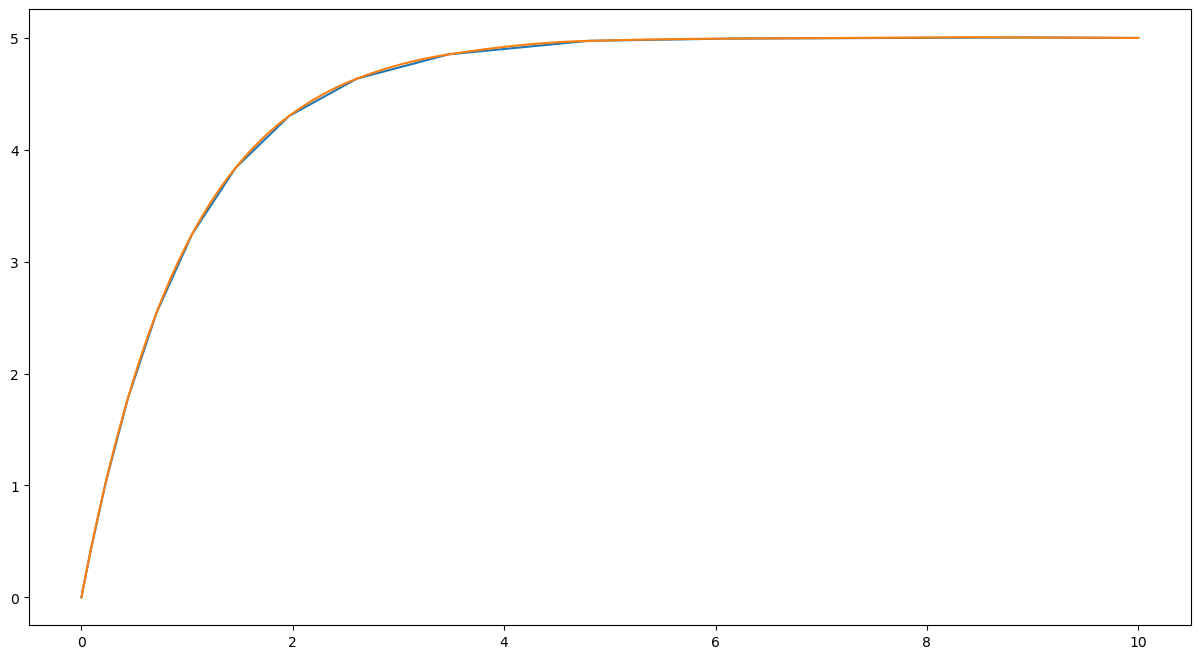

In [25]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import scipy.integrate as integrate
import numpy.polynomial.polynomial as poly


"""Charge d'un condensateur"""


def RC_charge(t, y, E, R, C):
    tau = R * C
    return E / tau - y / tau


# Programme principal
if __name__ == "__main__":
    R = 1e3  # ohm
    C = 1e-3  # Farad
    E = 5  # V
    Initial_condition = [0]
    Time_interval = [0, 10]

    sol0 = integrate.solve_ivp(
        RC_charge,
        Time_interval,
        Initial_condition,
        method="RK23",
        vectorized=True,
        args=(E, R, C),
    )
    sol = integrate.solve_ivp(
        RC_charge,
        Time_interval,
        [0],
        method="RK23",
        vectorized=True,
        args=(E, R, C),
        t_eval=np.linspace(Time_interval[0], Time_interval[1], 500),
    )

    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(1, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    # avec paramètres par défauts sans préciser le nombre de points
    ax1.plot(sol0.t, sol0.y[0, :])
    # avec indication des points pour effectuer l'intégration
    ax1.plot(sol.t, sol.y[0, :])
    plt.show()

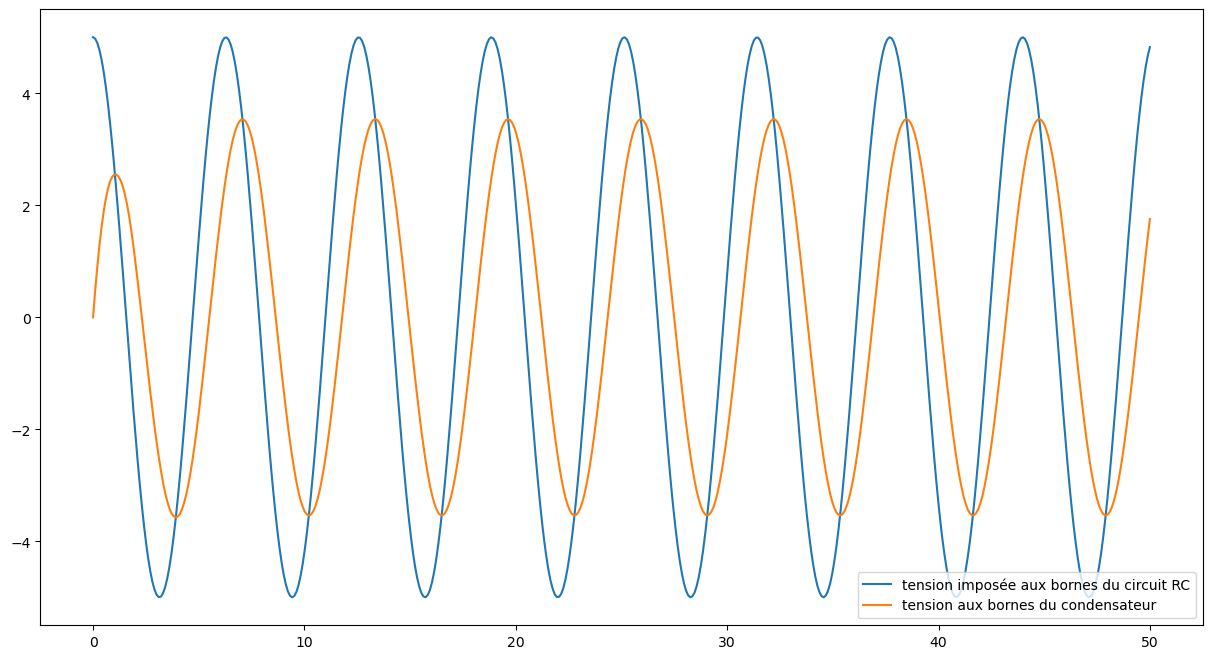

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import scipy.integrate as integrate
import numpy.polynomial.polynomial as poly


"""Charge d'un condensateur en régime sinusoïdal"""


def RC_charge(t, y, E, R, C, w):
    tau = R * C
    return E * np.cos(w * t) / tau - y / tau


# Programme principal
if __name__ == "__main__":
    R = 1e3  # ohm
    C = 1e-3  # Farad
    E = 5  # V
    w = 1  # rad.s
    Initial_condition = [0]
    Time_interval = [0, 50]

    sol = integrate.solve_ivp(
        RC_charge,
        Time_interval,
        Initial_condition,
        method="RK23",
        vectorized=True,
        args=(E, R, C, w),
        t_eval=np.linspace(Time_interval[0], Time_interval[1], 500),
    )

    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(1, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    # tracé de la tension imposée
    ax1.plot(
        sol.t, E * np.cos(w * sol.t), label="tension imposée aux bornes du circuit RC"
    )

    # avec indication des points pour effectuer l'intégration
    ax1.plot(sol.t, sol.y[0, :], label="tension aux bornes du condensateur")
    ax1.legend()
    plt.show()

# Équation différentielle vectorielle

Dans ce cas, la démarche est rigoureusement identique, la différence principale étant que la fonction sur laquelle porte l'intégration est vectorielle.

Par exemple, pour l'équation différentielle vectorielle suivante :
$$
\begin{pmatrix}
\dot{v_x} \\
\dot{v_y} \\
\dot{v_z}
\end{pmatrix}
=\begin{pmatrix}
\dfrac{qB}{m}v_y \\
-\dfrac{qB}{m}v_x \\
0
\end{pmatrix}
$$

Il faut utiliser le code suivant :

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.004e-02 ...  9.980e+00  1.000e+01]
        y: [[ 1.000e+00  9.998e-01 ... -8.402e-01 -8.295e-01]
            [ 0.000e+00 -2.004e-02 ...  5.240e-01  5.408e-01]
            [ 1.000e-01  1.000e-01 ...  1.000e-01  1.000e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 158
     njev: 0
      nlu: 0


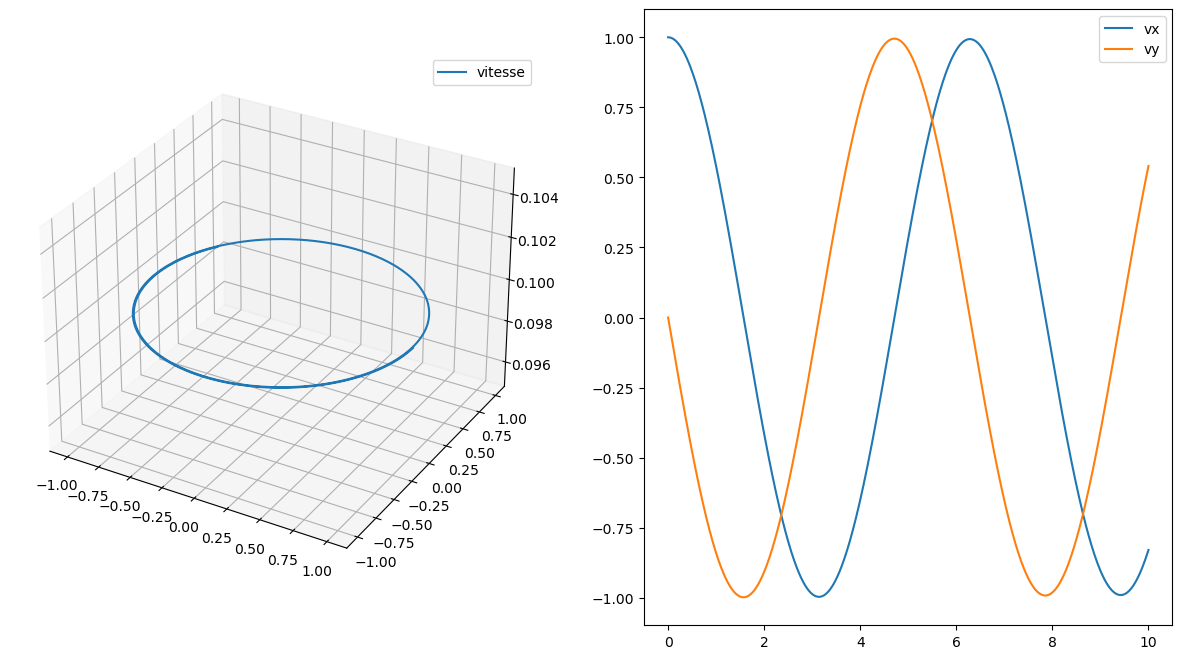

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import scipy.integrate as integrate
import numpy.polynomial.polynomial as poly


"""Mouvement d'une particule chargée dans un champ magnétique"""


def particule(t, v, q, B, m):
    alpha = q * B / m
    vx, vy, vz = v
    return np.array([alpha * vy, -alpha * vx, 0])


# Programme principal
if __name__ == "__main__":
    q = 1  # charge
    B = 1  # champ magnétique
    m = 1  # masse
    vx0 = 1
    vz0 = 0.1
    Initial_condition = [vx0, 0, vz0]
    Time_interval = [0, 10]

    sol = integrate.solve_ivp(
        particule,
        Time_interval,
        Initial_condition,
        method="RK23",
        args=(q, B, m),
        t_eval=np.linspace(Time_interval[0], Time_interval[1], 500),
    )
    print(sol)
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(1, 2)
    ax1 = fig.add_subplot(gs[0, 0], projection="3d")

    # tracé en trois dimension des coordonnées du vecteur vitesse.
    # avec indication des points pour effectuer l'intégration
    ax1.plot(sol.y[0, :], sol.y[1, :], sol.y[2, :], label="vitesse")

    ax1.legend()

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(sol.t, sol.y[0, :], label="vx")
    ax2.plot(sol.t, sol.y[1, :], label="vy")
    ax2.legend()
    plt.show()

# Équation différentielle scalaire du second ordre

Pour une équation différentielle du second ordre, il faut transformer l'équation scalaire en équation vectorielle à 2 composantes.

Ainsi, on va transformer l'équation différentielle du second ordre de la forme :
$$\ddot{u}+\dfrac{\omega_0}{Q}\dot{u}+ \omega_0^2u = f(t)$$

en équation vectorielle qui porte sur le vecteur $v = \begin{pmatrix}{u}  \\
\dot{u}\\
\end{pmatrix}$ sous la forme :
$$
\begin{pmatrix}
\dfrac{d u}{dt} = \dfrac{d v[0]}{dt}  \\
\dfrac{d\dot{u}}{dt} = \dfrac{d v[1]}{dt}\\
\end{pmatrix}
=\begin{pmatrix}
\dot{u}  \\
\ddot{u}\\
\end{pmatrix}=\begin{pmatrix}
\dot{u} = v[1] \\
-\dfrac{\omega_0}{Q}\dot{u}-\omega_0^2 u +f(t) \\
\end{pmatrix}
$$

L'astuce étant d'utiliser la deuxième coordonnée du vecteur comme valeur de la dérivée de la première composante.

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.202e-01 ...  5.988e+01  6.000e+01]
        y: [[ 4.000e+00  3.971e+00 ... -1.897e-01 -1.857e-01]
            [ 0.000e+00 -4.769e-01 ...  2.208e-02  4.428e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 929
     njev: 0
      nlu: 0


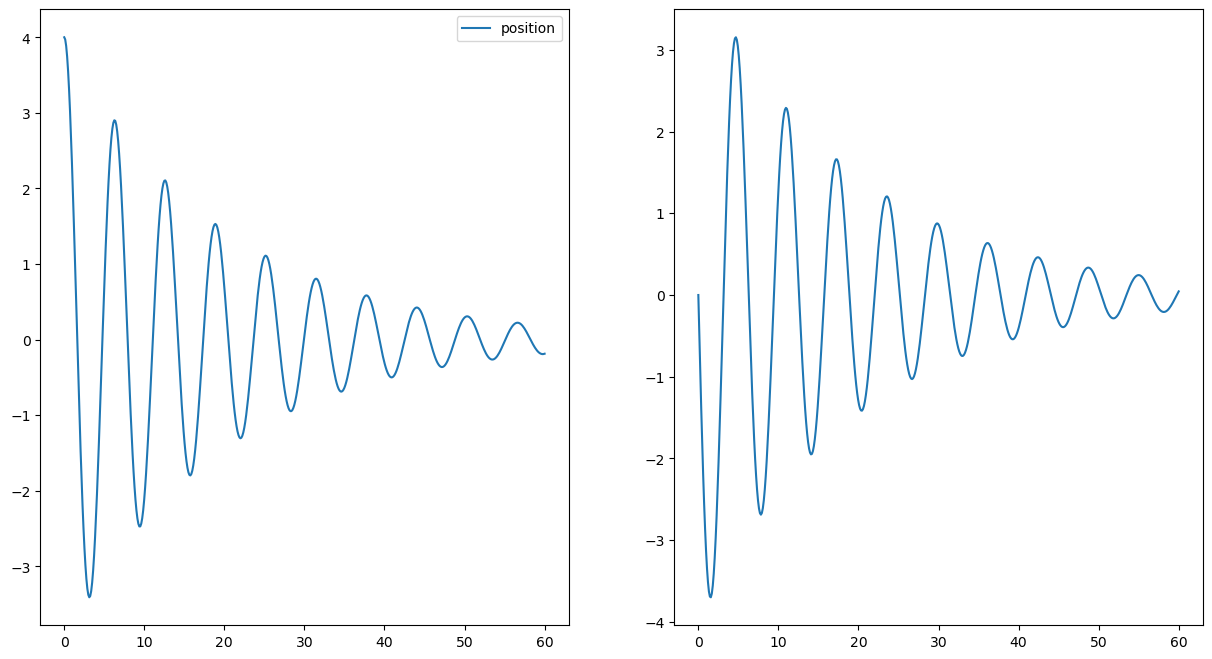

In [47]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import scipy.integrate as integrate
import numpy.polynomial.polynomial as poly


"""Oscillateur harmonique amorti"""


def oscillateur(t, v, h, k, m):
    w02 = k / m
    w0Q = h / m
    u, du = v
    return np.array([du, -w0Q * du - w02 * u])


# Programme principal
if __name__ == "__main__":
    k = 1  # constante de raideur
    h = 0.1  # force de frottement
    m = 1  # masse
    Initial_condition = [4, 0]
    Time_interval = [0, 60]

    sol = integrate.solve_ivp(
        oscillateur,
        Time_interval,
        Initial_condition,
        method="RK23",
        args=(h, k, m),
        t_eval=np.linspace(Time_interval[0], Time_interval[1], 500),
    )
    print(sol)
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(1, 2)
    ax1 = fig.add_subplot(gs[0, 0])

    # avec indication des points pour effectuer l'intégration
    ax1.plot(sol.t, sol.y[0, :], label="position")

    ax1.legend()

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(sol.t, sol.y[1, :], label="vitesse")
    plt.show()

Pour la particule chargée, si on s'intéresse maintenant à la trajectoire, on peut la trouver numériquement avec le code suivant qui décompose le problème en trois équations différentielles du second ordre.

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.008e-02 ...  1.996e+01  2.000e+01]
        y: [[ 0.000e+00  4.007e-02 ...  8.793e-01  8.959e-01]
            [ 0.000e+00 -8.039e-04 ... -5.698e-01 -6.054e-01]
            ...
            [ 0.000e+00 -4.007e-02 ... -8.793e-01 -8.959e-01]
            [ 1.000e-01  1.000e-01 ...  1.000e-01  1.000e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 290
     njev: 0
      nlu: 0


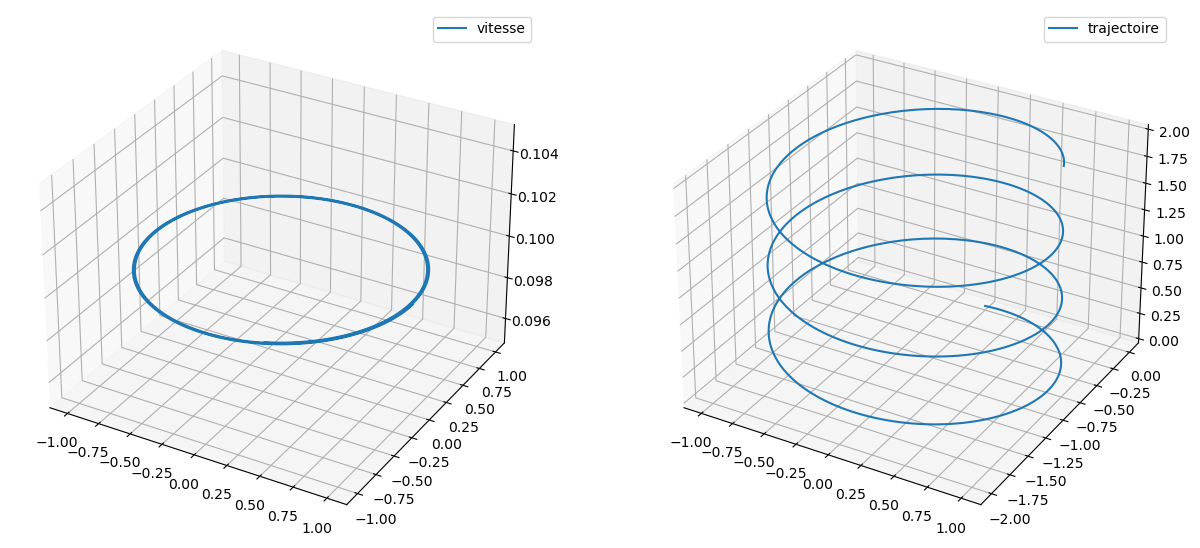

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import scipy.integrate as integrate
import numpy.polynomial.polynomial as poly


"""Mouvement d'une particule chargée dans un champ magnétique"""


def particule(t, v, q, B, m):
    alpha = q * B / m
    x, y, z, vx, vy, vz = v
    return np.array([vx, vy, vz, alpha * vy, -alpha * vx, 0])


# Programme principal
if __name__ == "__main__":
    q = 1  # charge
    B = 1  # champ magnétique
    m = 1  # masse
    vx0 = 1
    vz0 = 0.1
    Initial_condition = [0, 0, 0, vx0, 0, vz0]
    Time_interval = [0, 20]

    sol = integrate.solve_ivp(
        particule,
        Time_interval,
        Initial_condition,
        method="RK23",
        args=(q, B, m),
        t_eval=np.linspace(Time_interval[0], Time_interval[1], 500),
    )
    print(sol)
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(1, 2)
    ax1 = fig.add_subplot(gs[0, 0], projection="3d")

    # tracé en trois dimension des coordonnées du vecteur vitesse.
    # avec indication des points pour effectuer l'intégration
    ax1.plot(sol.y[3, :], sol.y[4, :], sol.y[5, :], label="vitesse")

    ax1.legend()
    # tracé en trois dimension de la trajectoire
    ax2 = fig.add_subplot(gs[0, 1], projection="3d")
    ax2.plot(sol.y[0, :], sol.y[1, :], sol.y[2, :], label="trajectoire")
    ax2.legend()
    plt.show()